In [140]:
library(dplyr)
library(lme4)
library(nlme)
library(purrr)
library(performance)
library(tibble)
library(MuMIn)
library(here)
library(reactablefmtr)
library(reactable)
library(emmeans)
library(car)
library(ggplot2)
library(modelr)

In [116]:
setwd(here::here())

In [117]:
# Load all joined dataset
source("./scripts/code_join_data_full_dataset.R")

# Step was done like this because I am working with a subset of the data
# source cleaned data
source("./scripts/code_clean_data_nodules.R")

In [114]:
# Load custom made functions
source("./R/functions_models.R")
source("./R/function_plots.R")
source("./R/function_validation_plots.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")


In [115]:
# set plot dimensions
options(repr.plot.width = 20)
options(repr.plot.height = 10)

__For running each peice of code press shift + Enter__

# __Q2:How does increased nutrient and/or water availability influence seedling water and nutrient-use traits and the relationships with N-fixing bacteria?__

## Models

### Traits

In [118]:
# Take response variables names
response_vars_q2 <-

  set_names(c("amax", "gs","pnue",
            "d13c", "sla"))

In [119]:
models_q2 <- map(response_vars_q2, ~mixed_model_1(response = .x,
                                                data = data_for_models))

names(models_q2)

[1] "amax" "gs"   "pnue" "d13c" "sla"

In [120]:
## Narea_g_m2 log model
model_q2_n_area_log <- lmer(log(Narea_g_m2) ~ nfixer*treatment +
                                                   init_height +
                                                   (1|spcode),
                         data = data_for_models)

model_q2_n_area_log <- list(model_q2_n_area_log)

names(model_q2_n_area_log) <- "n_area_log"

In [121]:
## WUE log model
model_q2_wue_log <- lmer(log(wue) ~ nfixer*treatment +
                                        init_height +
                                        (1|spcode),
                         data = data_for_models)

model_q2_wue_log <- list(model_q2_wue_log)

names(model_q2_wue_log) <- "wue_log"

### Nodule count 

In [122]:
# Delete unused variables
data_nodules_cleaned <-
    data_nodules_cleaned %>%

        # add id to rownames for keep track of the rows
        column_to_rownames("id") %>%
        dplyr::select(spcode, treatment, everything())

In [123]:
nlme_nodule_log_weights <- lme(log(number_of_root_nodulation) ~ treatment + init_height,
                                    random = ~1|spcode,
                                    weights = varIdent(form = ~1|spcode),
                                    data = data_nodules_cleaned)


model_q2_nodule_log <- list(nlme_nodule_log_weights)

names(model_q2_nodule_log) <- "nodule_log"

In [124]:
# Append log models to model list
models_q2 <- append(model_q2_n_area_log, models_q2)
models_q2 <- append(model_q2_wue_log, models_q2)
models_q2 <- append(model_q2_nodule_log, models_q2)

In [125]:
names(models_q2)

[1] "nodule_log" "wue_log"    "n_area_log" "amax"       "gs"        
[6] "pnue"       "d13c"       "sla"

## Model Assumptions

### Maximal photosynthesis

[1] "No variable specified inthe variables argument"


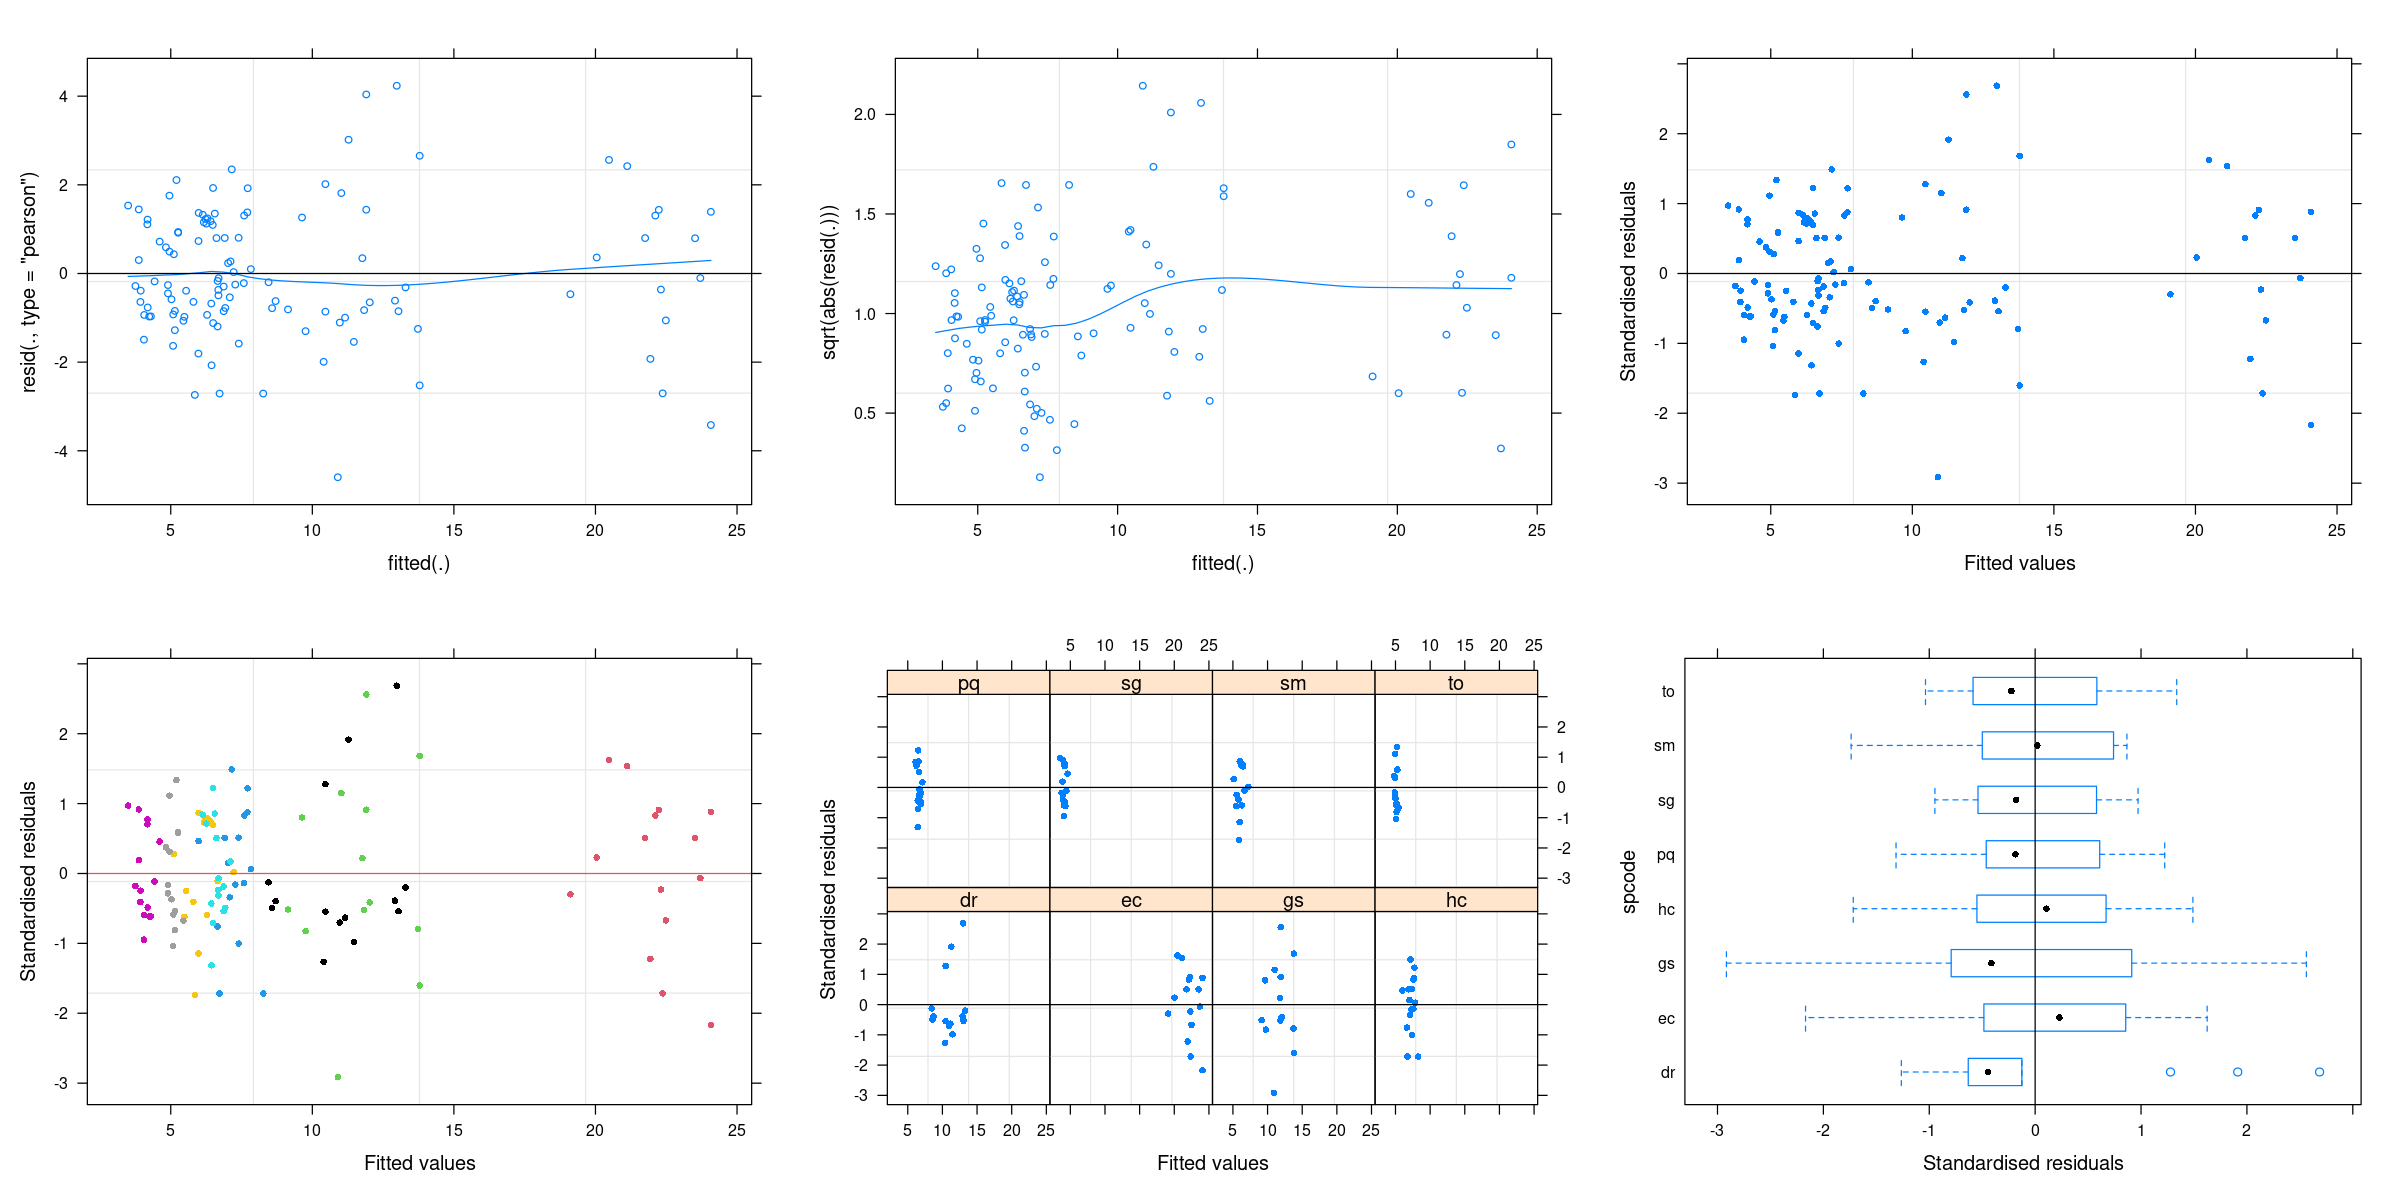

In [126]:
par(mfrow = c(3,3))
validation_plots(models_q2$amax, data = data_for_models,group = "spcode")

### Stomatal Conductance

[1] "No variable specified inthe variables argument"


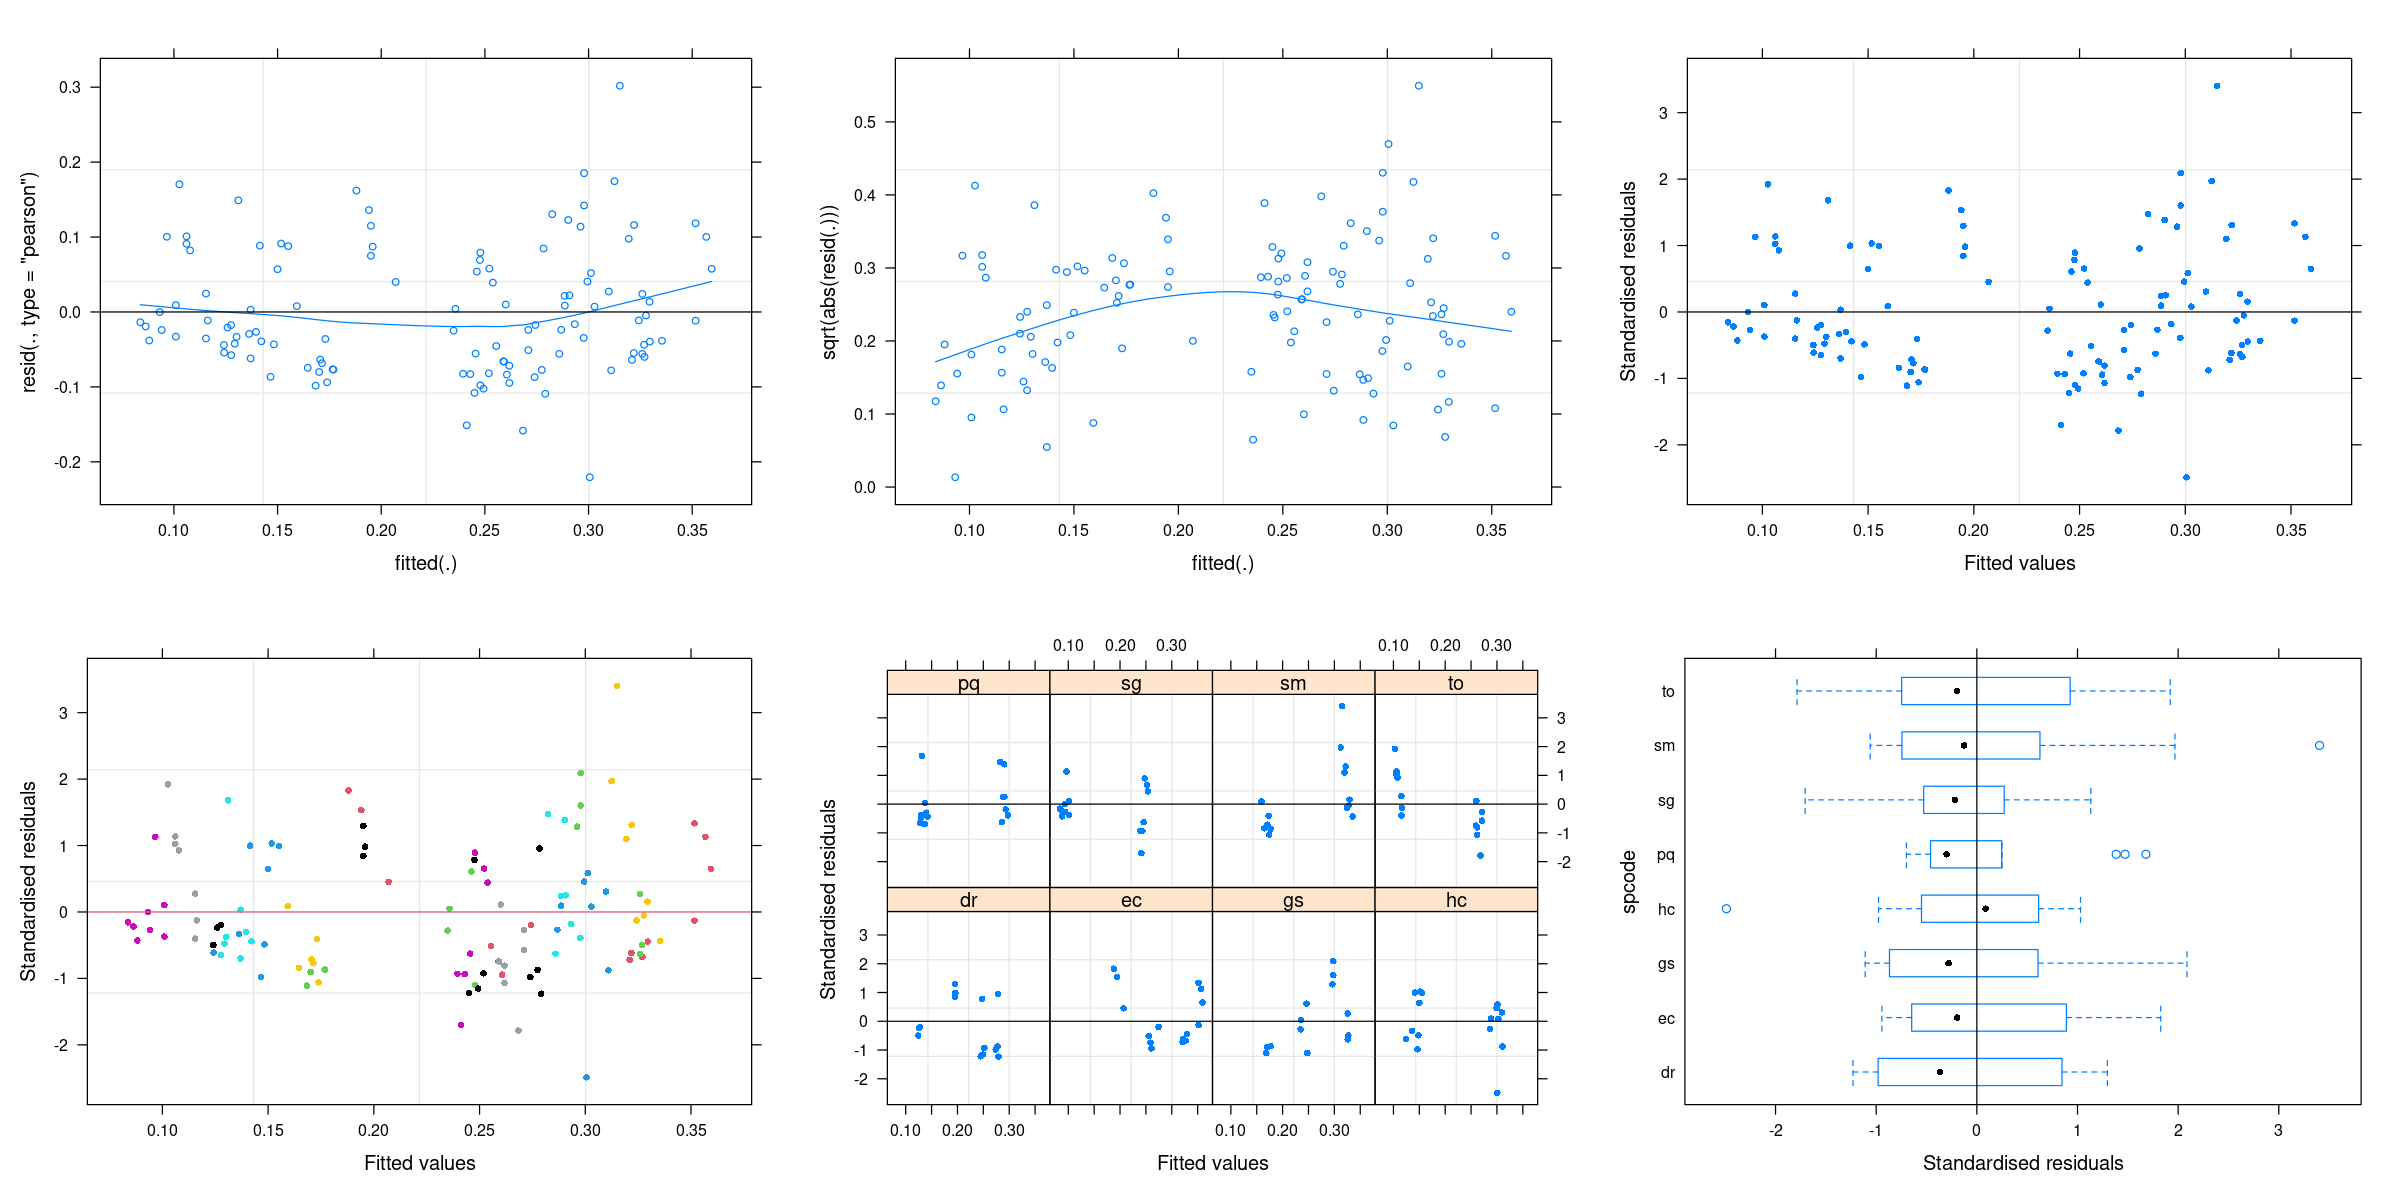

In [127]:
par(mfrow = c(3,3))
validation_plots(models_q2$gs, data = data_for_models,group = "spcode")

### Water Use Efficiency 

[1] "No variable specified inthe variables argument"


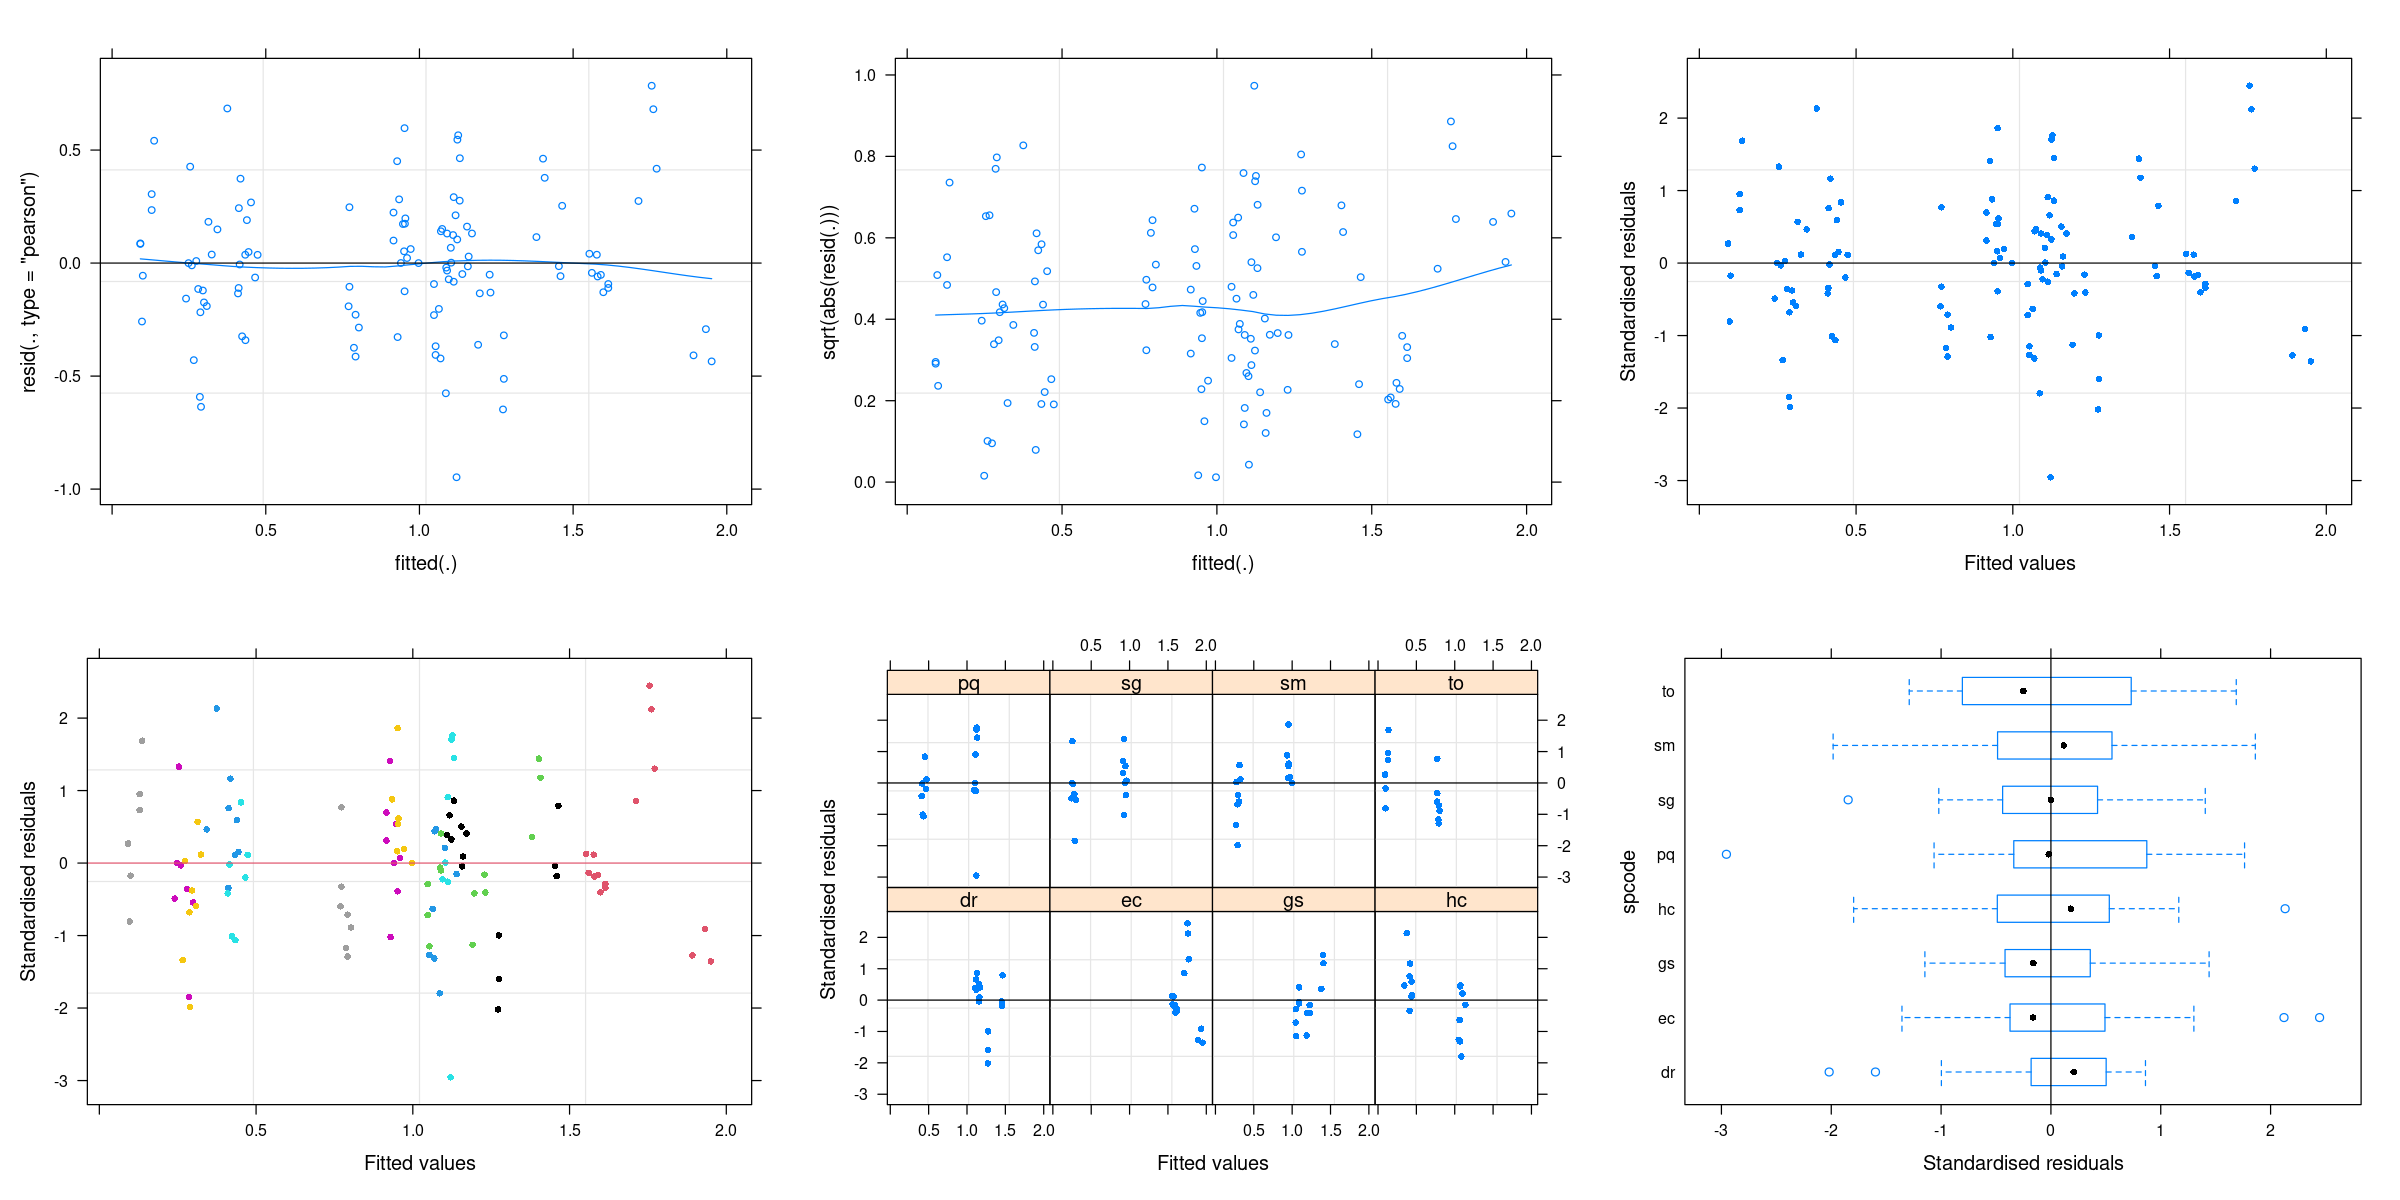

In [128]:
par(mfrow = c(3,3))
validation_plots(models_q2$wue_log, data = data_for_models,group = "spcode")

### Delta 13C

[1] "No variable specified inthe variables argument"


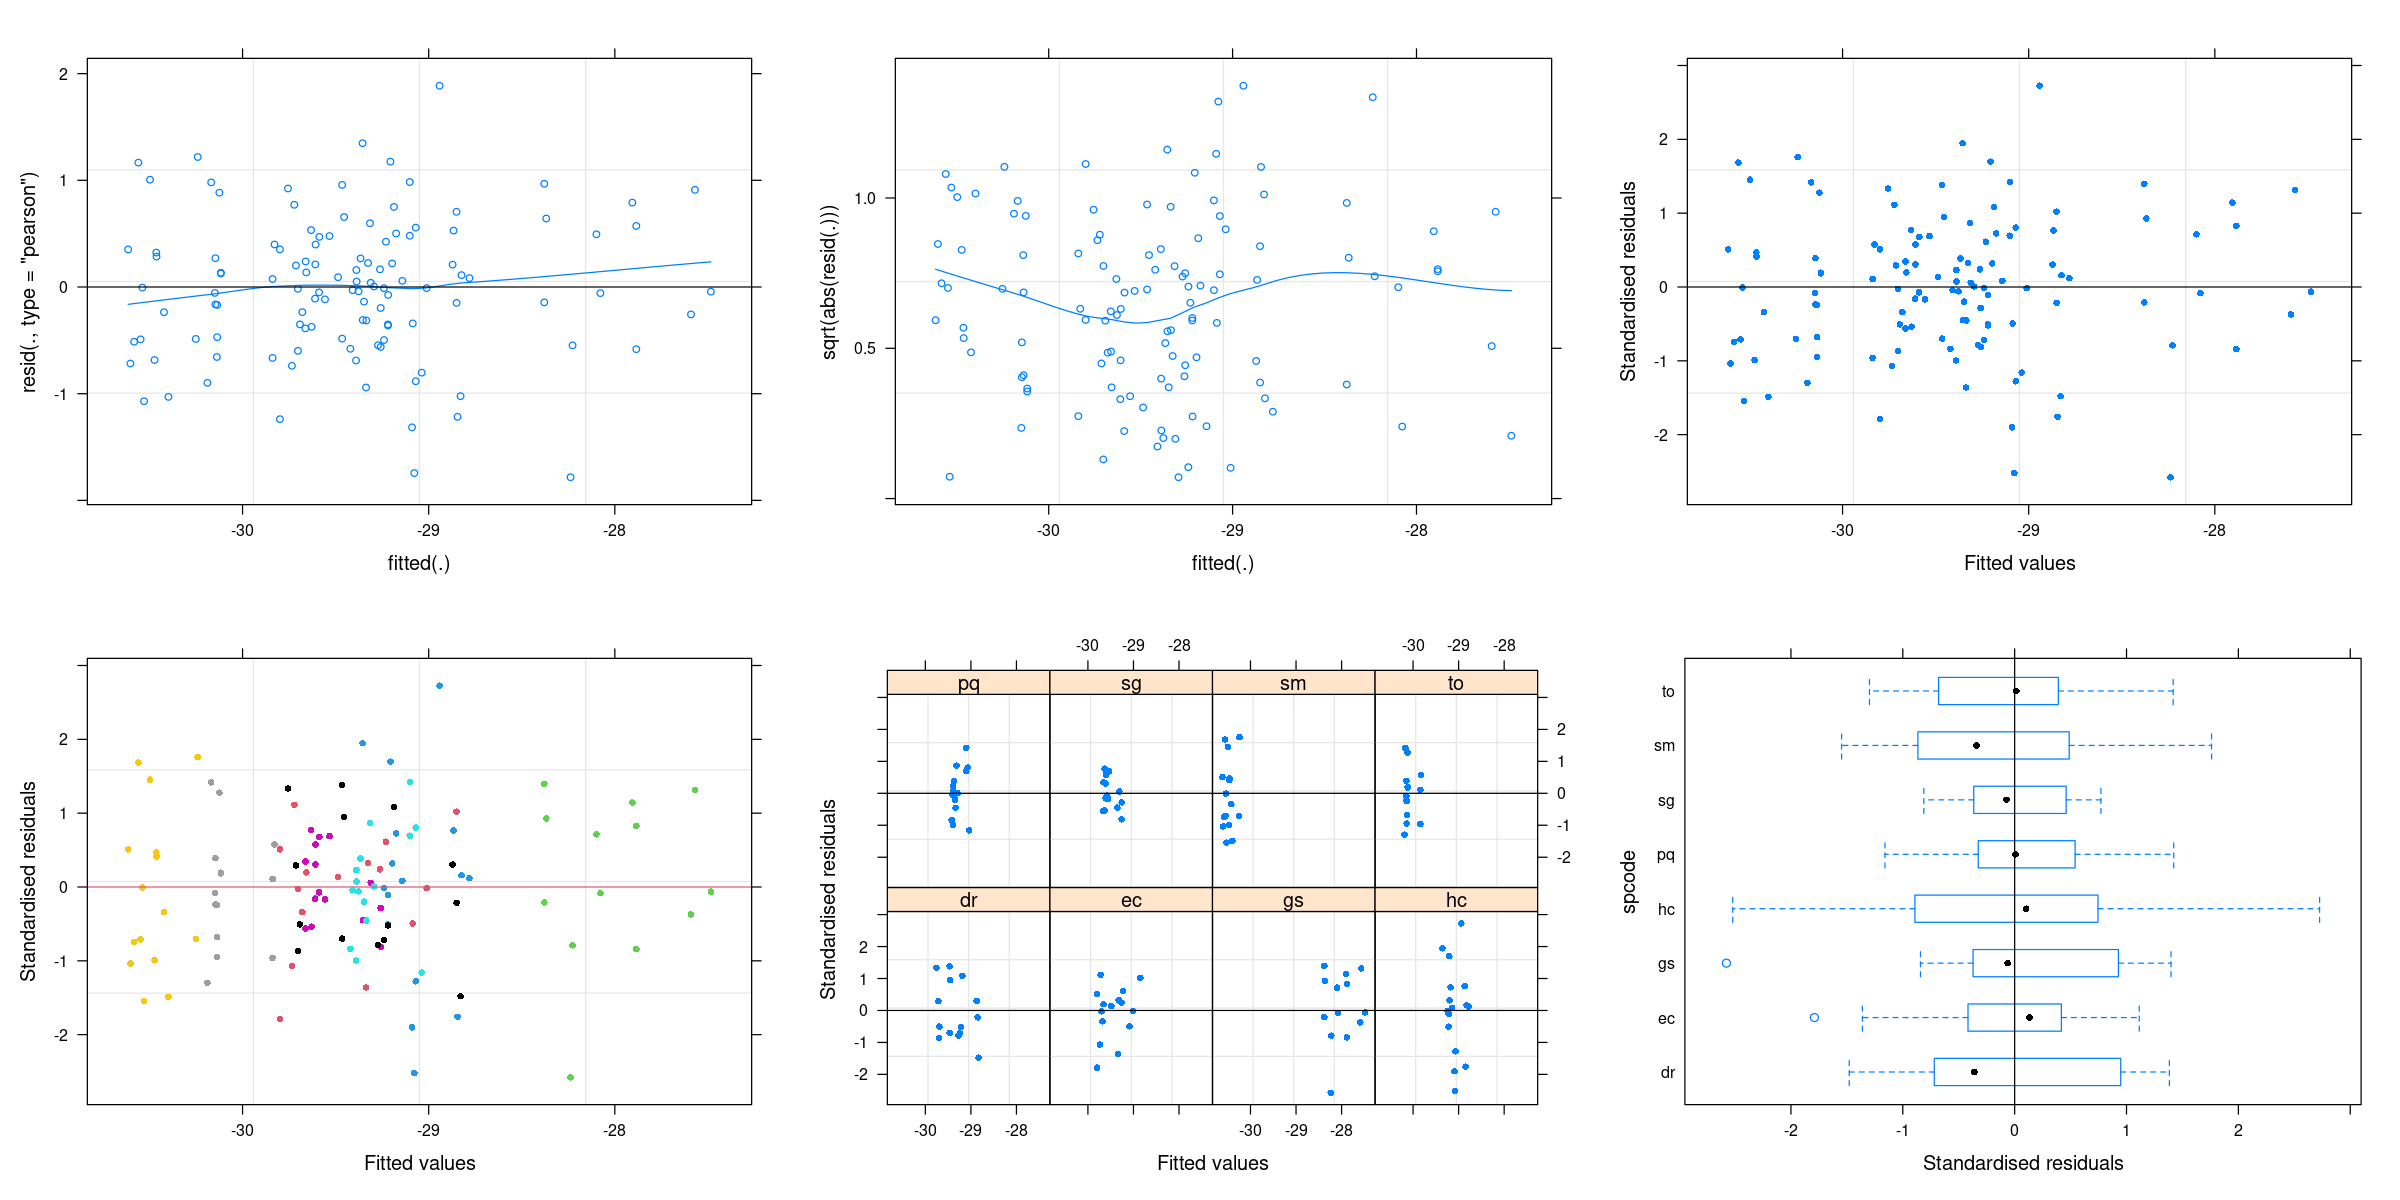

In [129]:
par(mfrow = c(3,3))
validation_plots(models_q2$d13c, data = data_for_models,group = "spcode")

### Specific leaf area

[1] "No variable specified inthe variables argument"


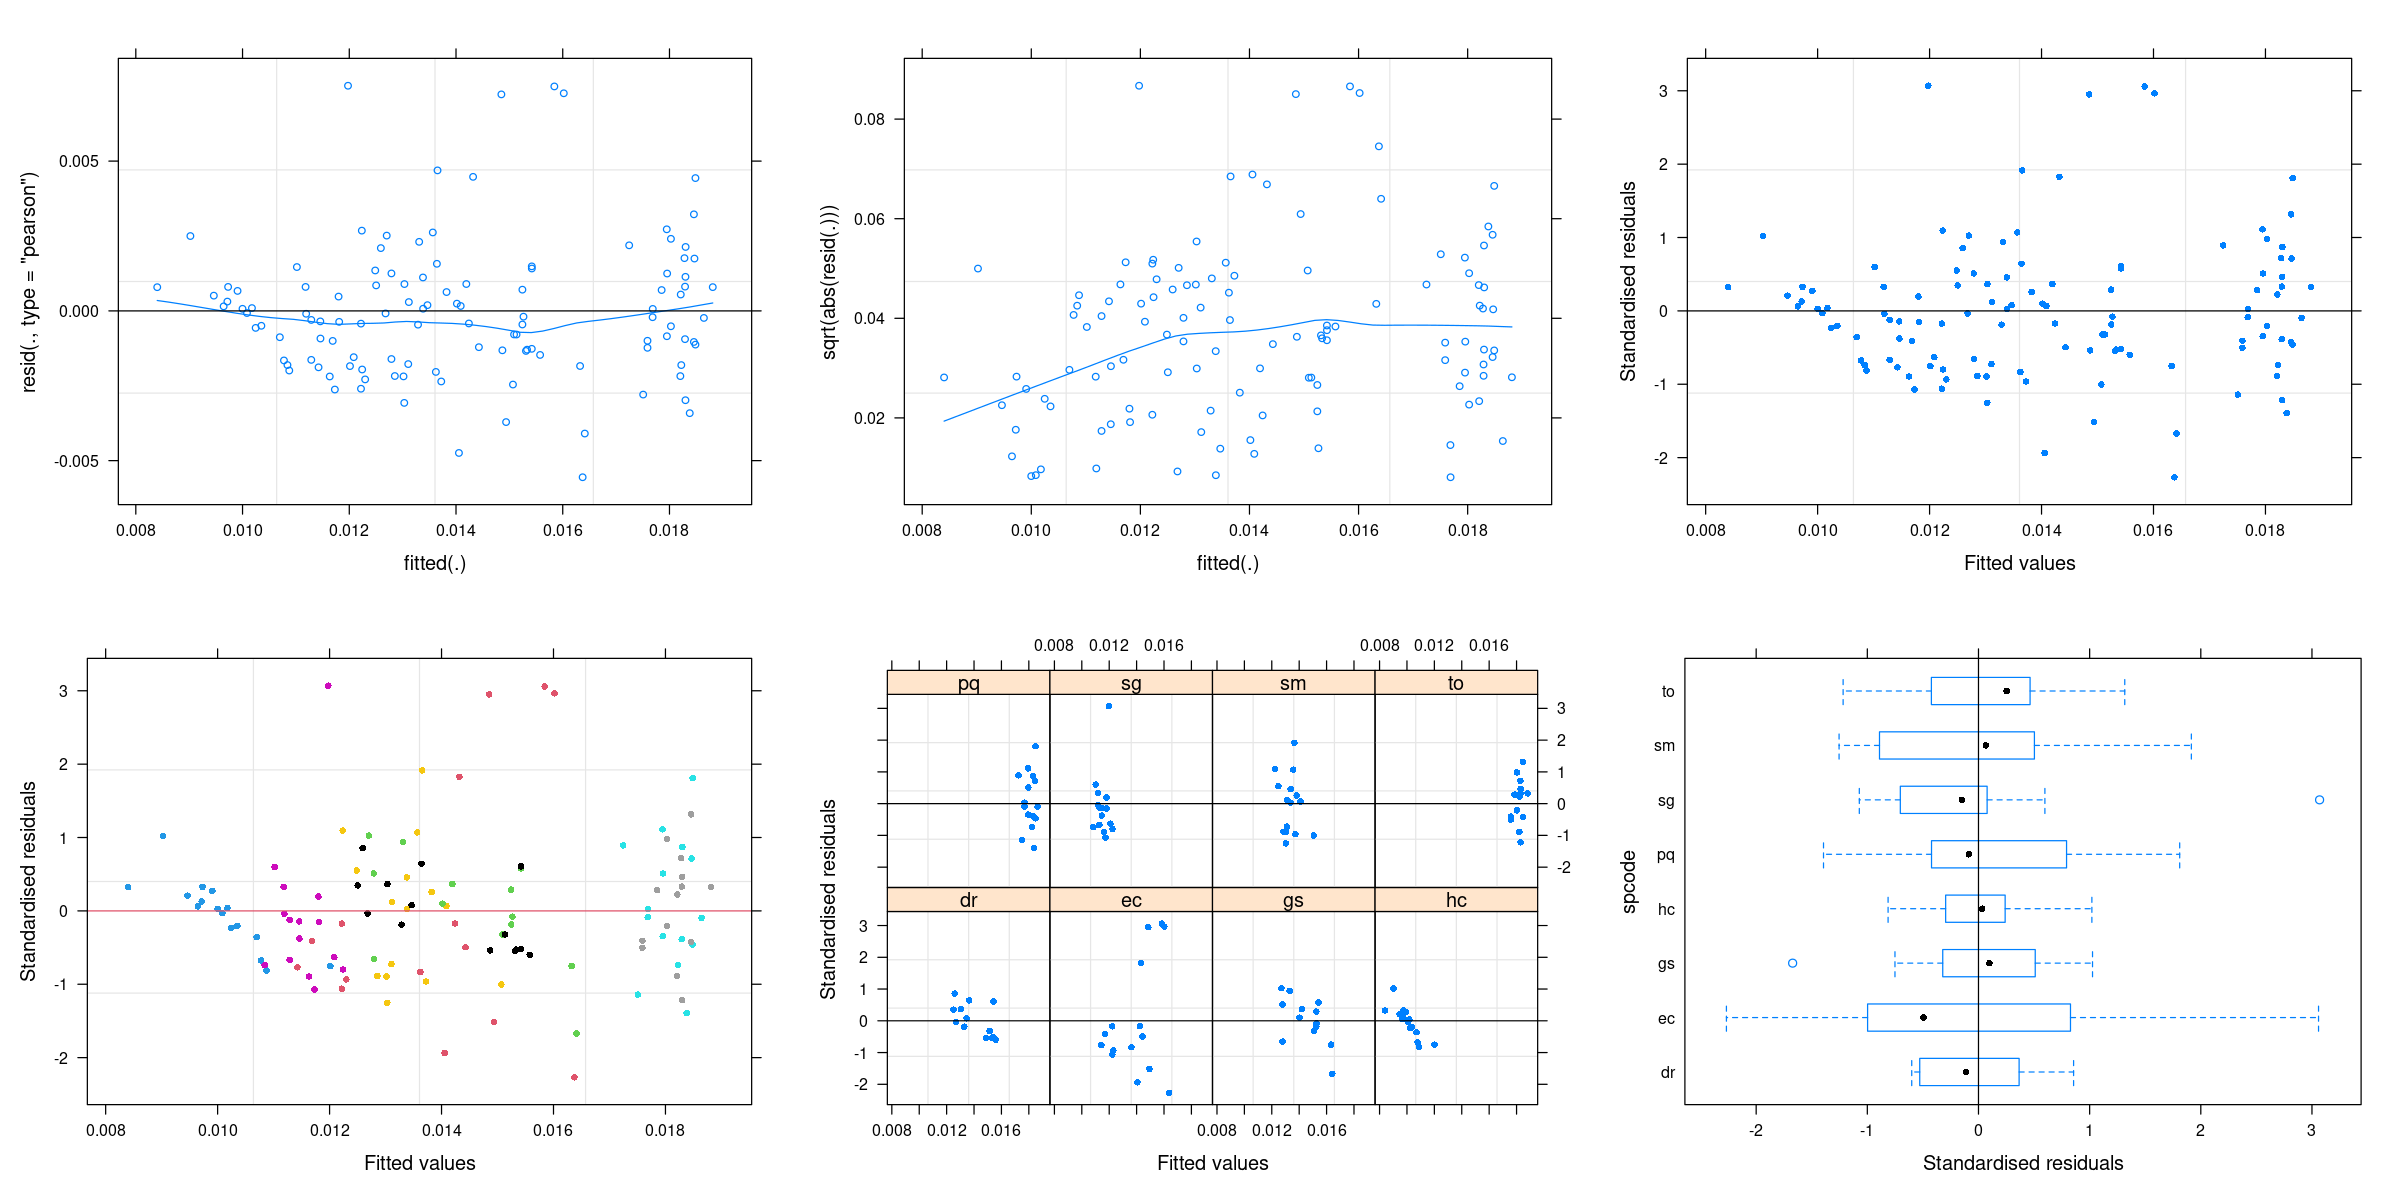

In [130]:
par(mfrow = c(3,3))
validation_plots(models_q2$sla, data = data_for_models,group = "spcode")

### Nitrogen concentration per unit of area

[1] "No variable specified inthe variables argument"


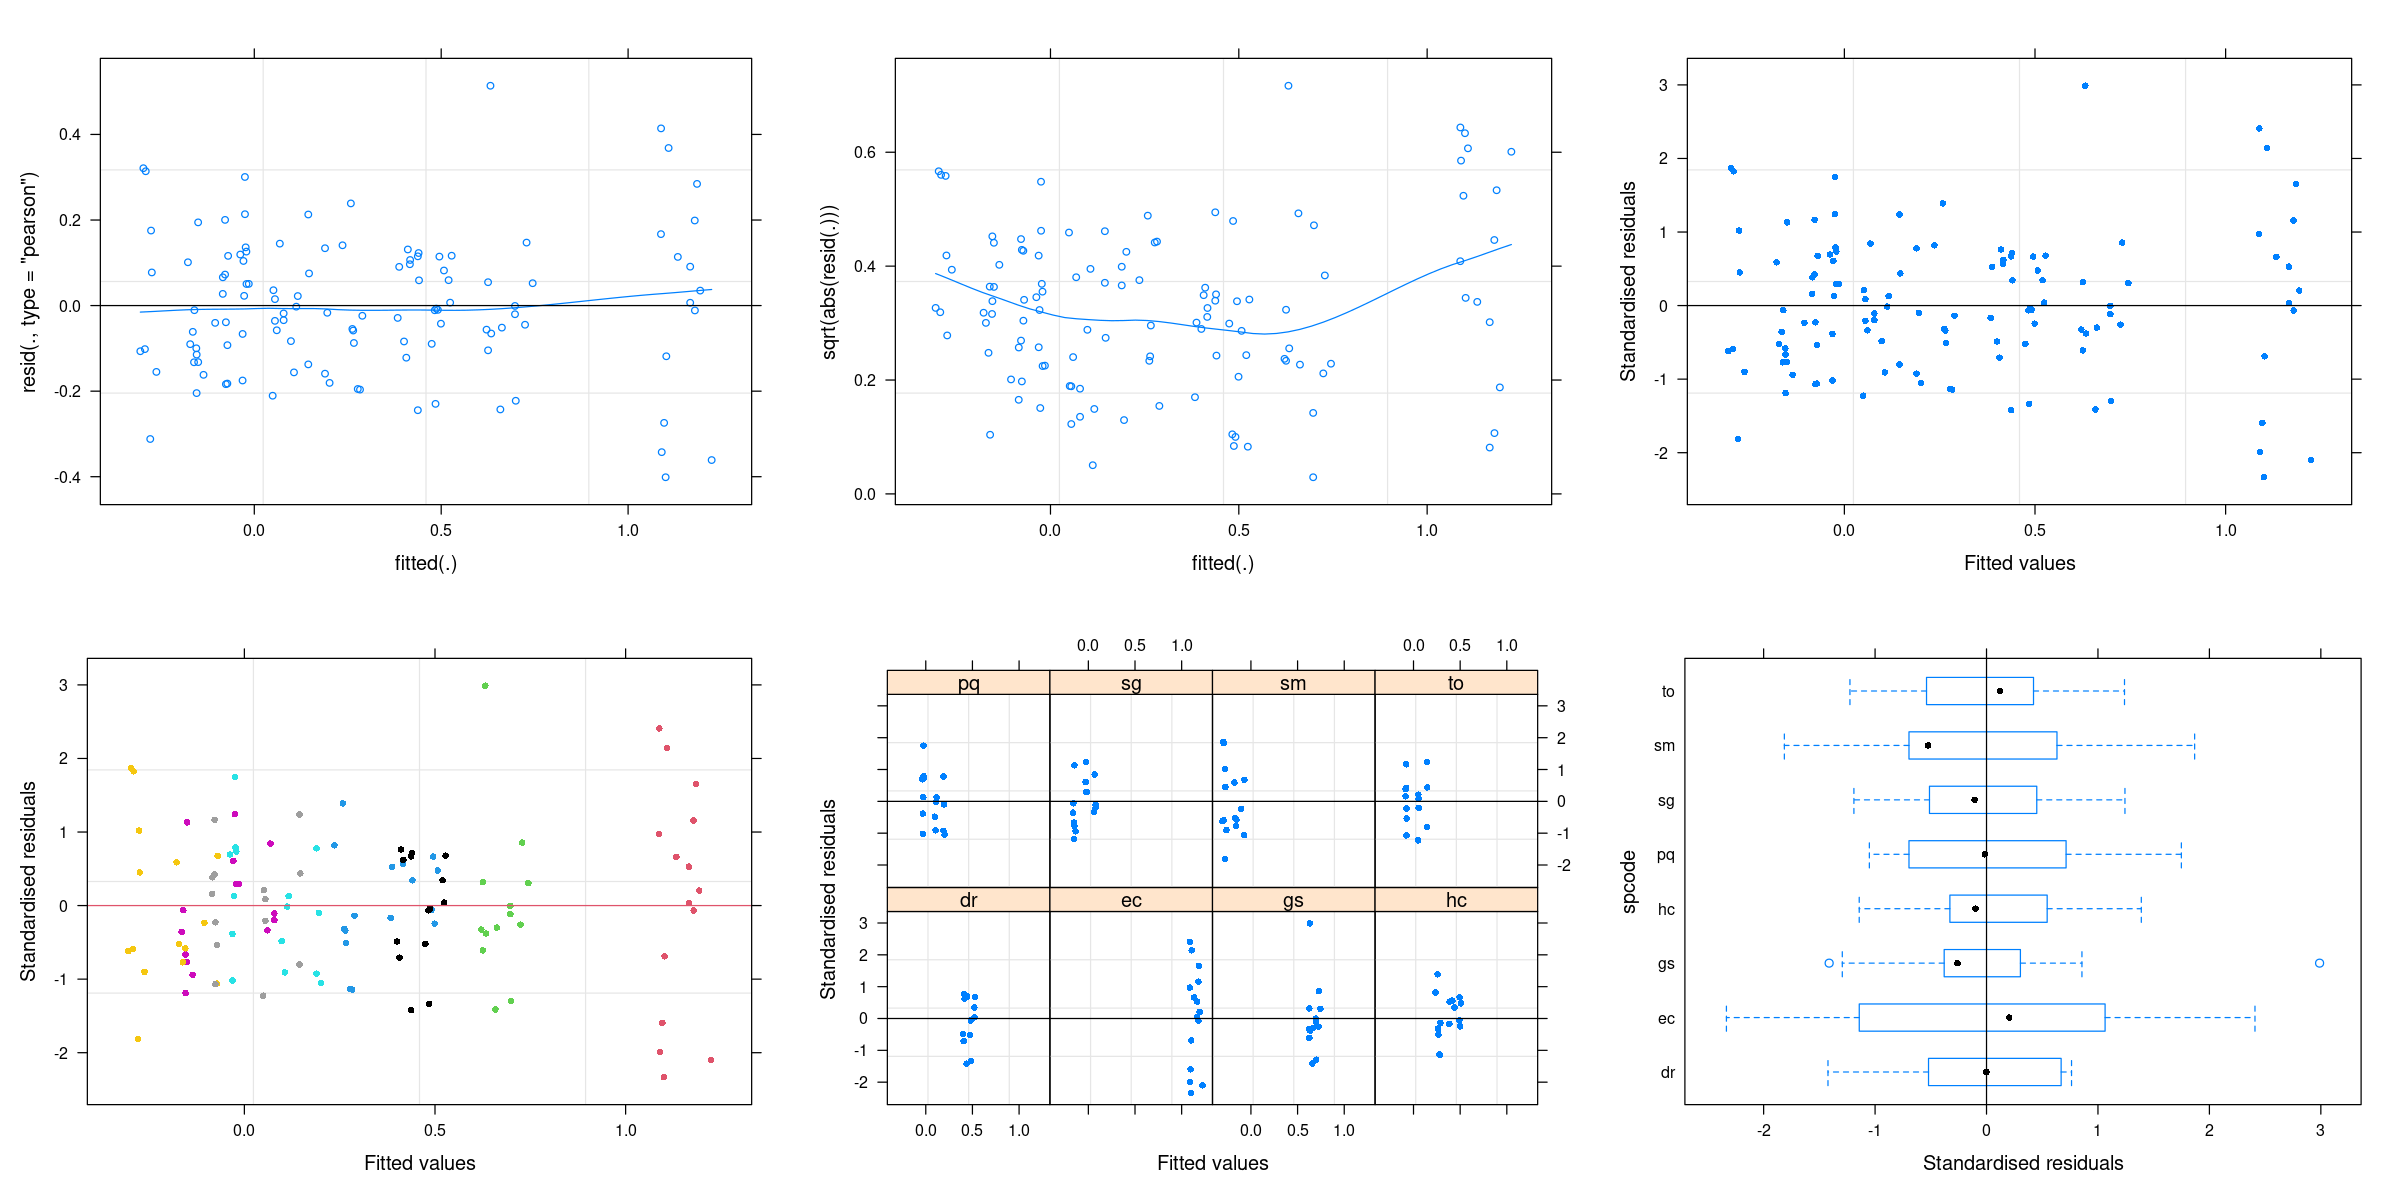

In [131]:
par(mfrow = c(3,3))
validation_plots(models_q2$n_area_log, data = data_for_models,group = "spcode")

### Photosyntetic Nitrogen use efficiency

[1] "No variable specified inthe variables argument"


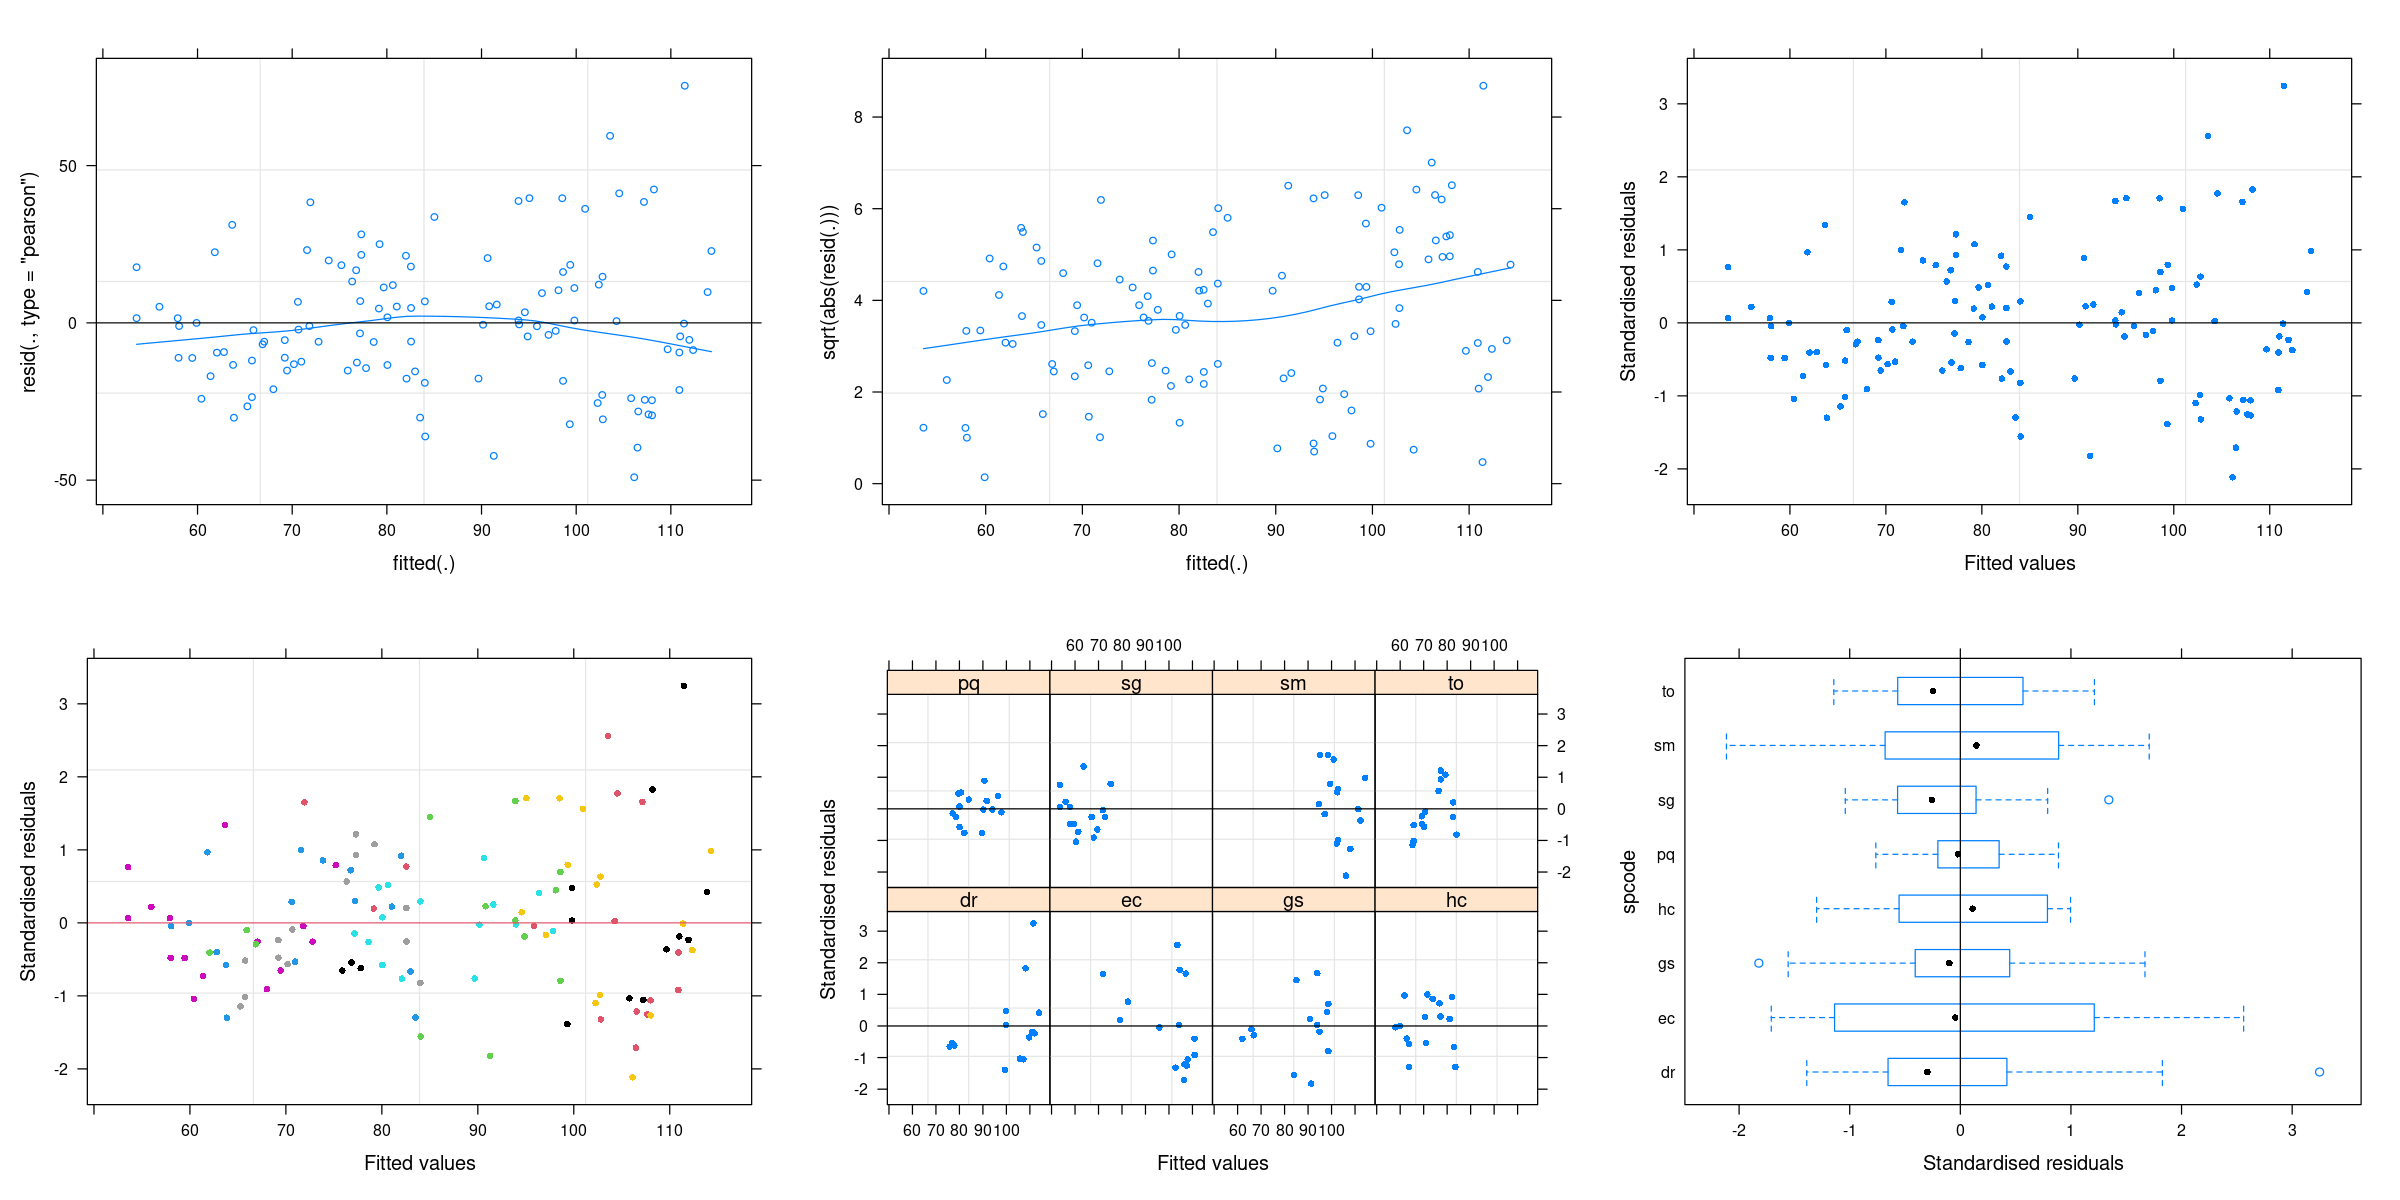

In [132]:
par(mfrow = c(3,3))
validation_plots(models_q2$pnue, data = data_for_models,group = "spcode")

### Nodule count

Zuur et al pp 84:

"Note that these residuals still show heterogeneity, but this is now allowed
(because the residual variation differs depending on the chosen variance
structure and values of the variance covariate). Hence, these residuals are
less useful for the model validation process."

[1] "No variable specified inthe variables argument"


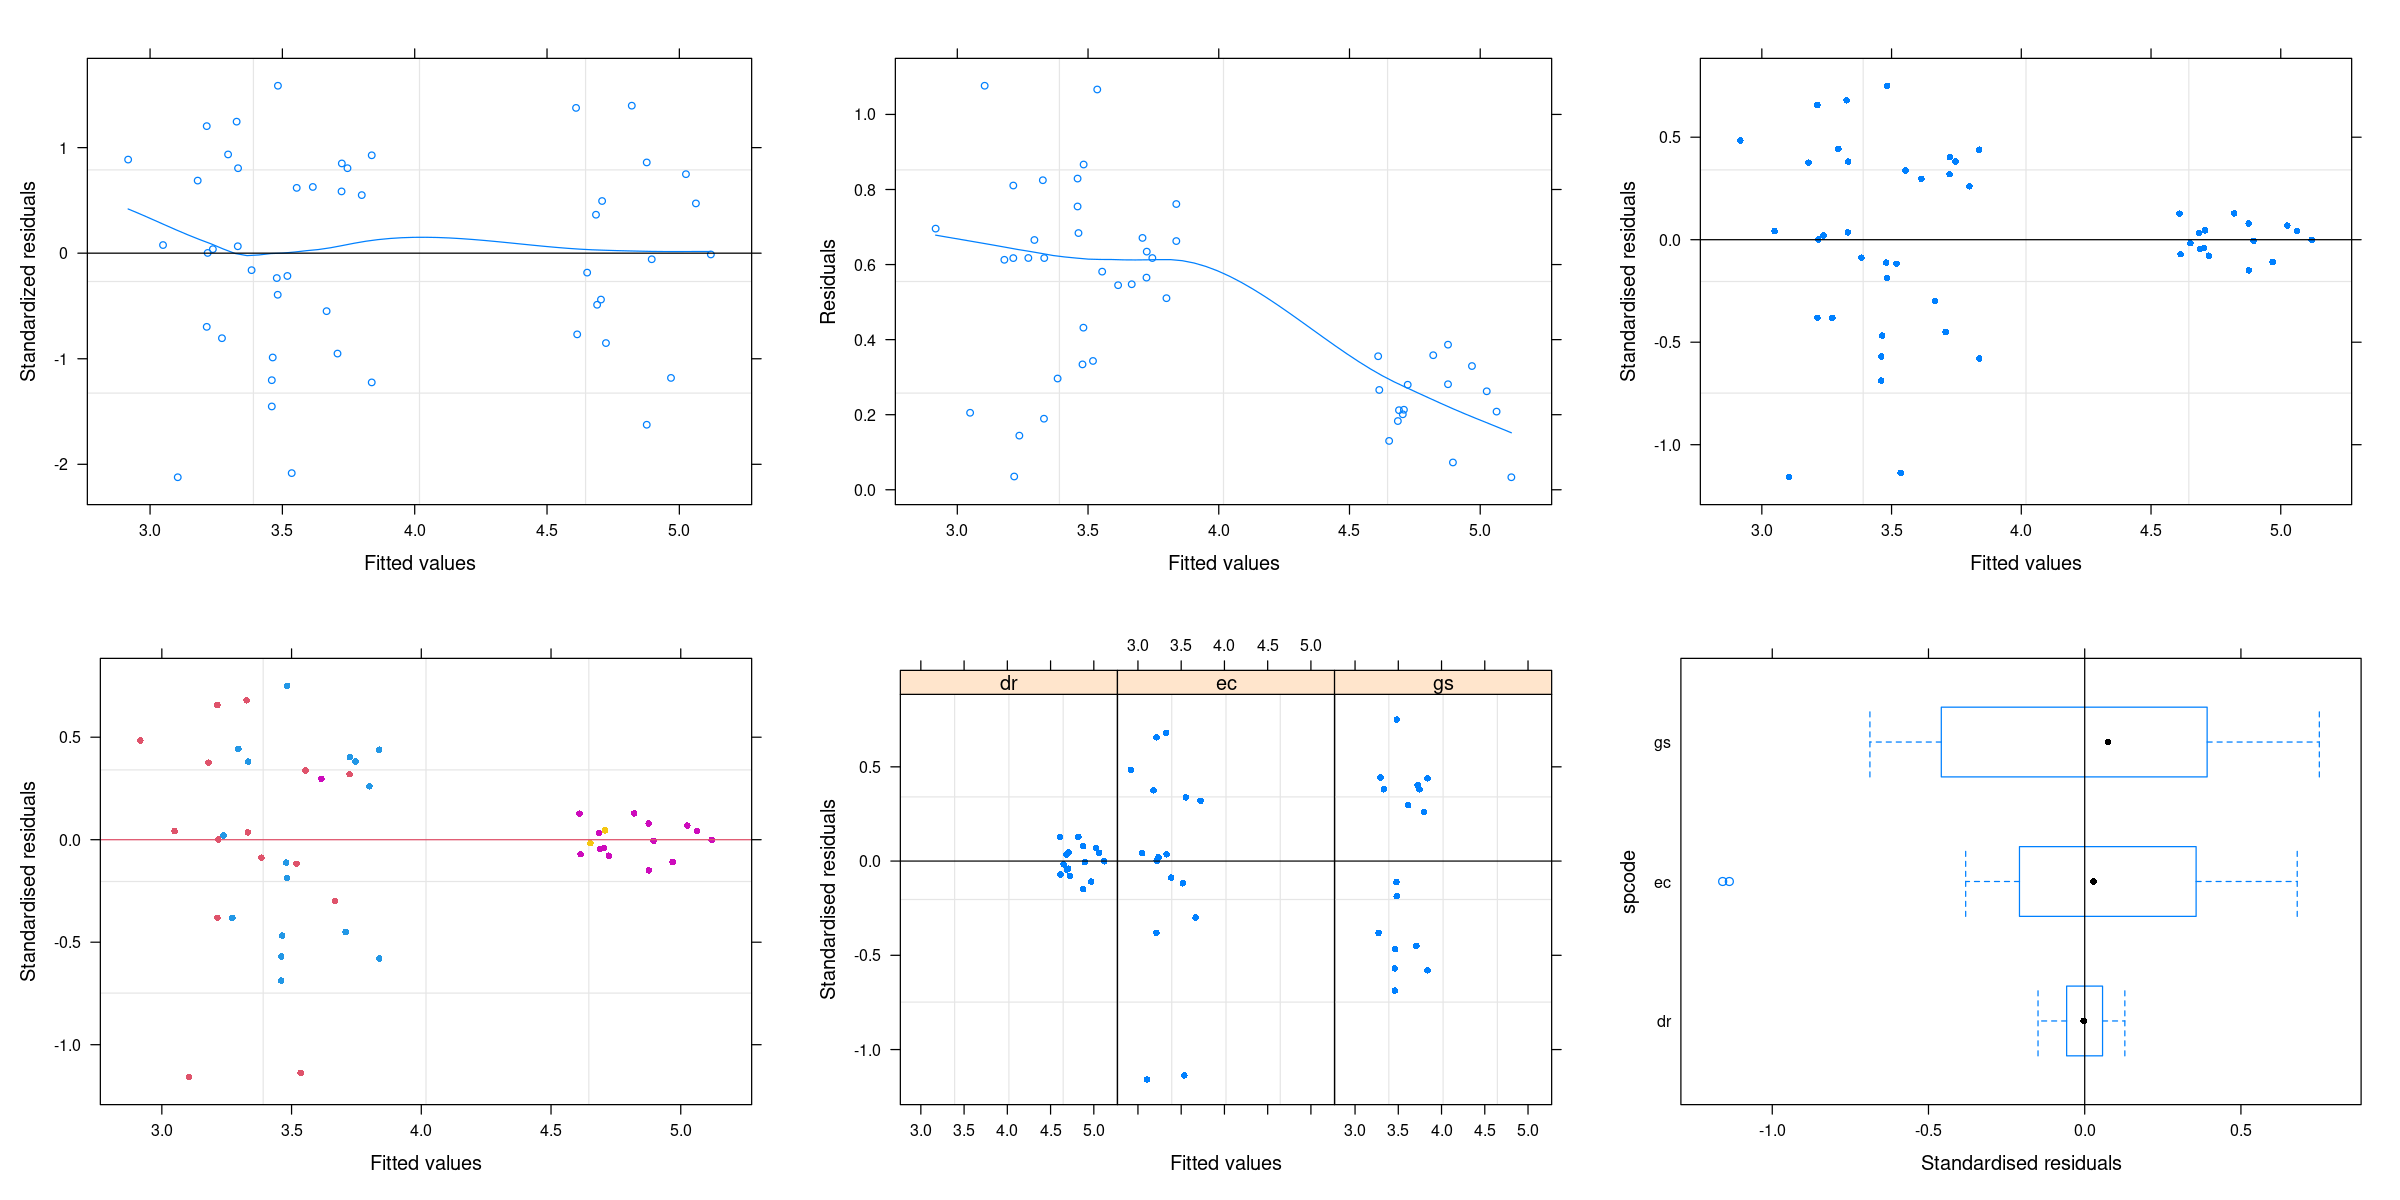

In [133]:
par(mfrow = c(3,3))
validation_plots(models_q2$nodule_log, data = data_for_models,group = "spcode")

## Model inference

In [112]:
## r2 models
models_q2 %>%
    map(., r2) %>%
    unlist()

nodule_log.R2_conditional.Conditional R2 
                              0.99210949 
      nodule_log.R2_marginal.Marginal R2 
                              0.05918329 
   wue_log.R2_conditional.Conditional R2 
                              0.71998191 
         wue_log.R2_marginal.Marginal R2 
                              0.55826930 
n_area_log.R2_conditional.Conditional R2 
                              0.86655502 
      n_area_log.R2_marginal.Marginal R2 
                              0.58167860 
      amax.R2_conditional.Conditional R2 
                              0.94110209 
            amax.R2_marginal.Marginal R2 
                              0.49634925 
        gs.R2_conditional.Conditional R2 
                              0.46868890 
              gs.R2_marginal.Marginal R2 
                              0.39313270 
      pnue.R2_conditional.Conditional R2 
                              0.47363791 
            pnue.R2_marginal.Marginal R2 
                              0.19199892 
      d13c.R2_conditional.Conditional R2 
                              0.57623745 
            d13c.R2_marginal.Marginal R2 
                              0.17823798 
       sla.R2_conditional.Conditional R2 
                              0.58102163 
             sla.R2_marginal.Marginal R2 
                              0.16972855

### Anova tables

In [37]:
map(models_q2, ~Anova(.x, type = "III", test.statistic = c("F")))

$nodule_log
Analysis of Deviance Table (Type III tests)

Response: log(number_of_root_nodulation)
              Chisq Df Pr(>Chisq)    
(Intercept) 27.5271  1  1.549e-07 ***
treatment   33.9910  3  1.990e-07 ***
init_height  5.3594  1    0.02061 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$wue_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(wue)
                       F Df  Df.res    Pr(>F)    
(Intercept)      33.4628  1  13.769 5.050e-05 ***
nfixer            4.0850  1   9.061  0.073774 .  
treatment        26.8453  3 102.585 6.753e-13 ***
init_height       0.3386  1  28.234  0.565258    
nfixer:treatment  4.6623  3 102.433  0.004275 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$n_area_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(Narea_g_m2)
                       F Df  Df.res    Pr(>F)    
(Intercept)       0.5883  1  11.181 0.4589603    
nfixer           15.9628  1   6.753 0.0056182 ** 
treatment         7.3650  3 102.260 0.0001618 ***
init_height       0.5198  1  84.673 0.4728932    
nfixer:treatment  2.3843  3 102.167 0.0736043 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$amax
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: amax
                       F Df  Df.res    Pr(>F)    
(Intercept)      12.3075  1   7.859 0.0082101 ** 
treatment         0.2570  3 102.089 0.8561844    
nfixer            7.9692  1   6.202 0.0291755 *  
init_height       5.3512  1 107.997 0.0226019 *  
treatment:nfixer  7.3837  3 102.053 0.0001585 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$gs
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: gs
                       F Df  Df.res    Pr(>F)    
(Intercept)       8.1567  1  13.303   0.01324 *  
treatment        18.6434  3 102.924 9.827e-10 ***
nfixer            6.3961  1  18.189   0.02089 *  
init_height       0.8571  1  10.438   0.37547    
treatment:nfixer  1.6952  3 102.823   0.17270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$pnue
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: pnue
                       F Df  Df.res    Pr(>F)    
(Intercept)      55.0023  1  13.762 3.621e-06 ***
treatment         2.0970  3 102.605    0.1052    
nfixer            0.9818  1   9.319    0.3468    
init_height       2.1500  1  26.298    0.1544    
treatment:nfixer  1.4822  3 102.453    0.2238    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$d13c
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: d13c
                         F Df  Df.res Pr(>F)    
(Intercept)      4480.3912  1  13.391 <2e-16 ***
treatment           0.9486  3 102.453 0.4201    
nfixer              1.3720  1   7.817 0.2759    
init_height         1.0058  1  44.979 0.3213    
treatment:nfixer    0.7592  3 102.315 0.5196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$sla
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: sla
                        F Df  Df.res    Pr(>F)    
(Intercept)      111.1196  1  13.316 7.778e-08 ***
treatment          0.2492  3 102.441   0.86176    
nfixer             0.4345  1   7.732   0.52893    
init_height        5.4331  1  46.890   0.02411 *  
treatment:nfixer   1.7986  3 102.305   0.15215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [83]:
anova.lme(models_q2$nodule_log, type = "marginal")

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,41,27.527073,5.056819e-06
treatment,3,41,11.330325,1.515061e-05
init_height,1,41,5.359407,2.569362e-02


### Post-Hoc: Tukey's test

#### Maximal photosynthesis

In [38]:
as_tibble(emmeans(models_q2$amax,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no_additions nonfixer - plus_nutrients nonfixer,-0.128657,0.515765,102.144768,-0.249448,0.999997
no_additions nonfixer - plus_water nonfixer,-0.431035,0.520791,102.004653,-0.827655,0.991131
no_additions nonfixer - plus_water_nutrients nonfixer,-0.071649,0.498836,102.014215,-0.143633,1.000000
no_additions nonfixer - no_additions fixer,-9.088761,3.219559,6.201600,-2.822983,0.238193
no_additions nonfixer - plus_nutrients fixer,-7.019938,3.226719,6.257198,-2.175565,0.461776
no_additions nonfixer - plus_water fixer,-11.422974,3.220218,6.206143,-3.547267,0.108377
no_additions nonfixer - plus_water_nutrients fixer,-9.783426,3.222881,6.224767,-3.035615,0.188810
plus_nutrients nonfixer - plus_water nonfixer,-0.302379,0.538011,102.126656,-0.562031,0.999222
plus_nutrients nonfixer - plus_water_nutrients nonfixer,0.057007,0.517720,102.230398,0.110112,1.000000


In [141]:
# Treatment effects
emmeans_table_tidy(models_q2$amax,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x5802307c4528>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### Water Use Efficiency

In [99]:
as_tibble(emmeans(models_q2$wue_log,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no_additions nonfixer - plus_nutrients nonfixer,0.022672,0.104732,102.853047,0.216478,0.999999
no_additions nonfixer - plus_water nonfixer,0.658058,0.105942,102.180123,6.211482,0.000000
no_additions nonfixer - plus_water_nutrients nonfixer,0.694960,0.101462,102.212724,6.849442,0.000000
no_additions nonfixer - no_additions fixer,-0.434992,0.215220,9.060734,-2.021147,0.516685
no_additions nonfixer - plus_nutrients fixer,-0.611355,0.219685,9.843645,-2.782872,0.203026
no_additions nonfixer - plus_water fixer,-0.309838,0.215497,9.072601,-1.437787,0.820654
no_additions nonfixer - plus_water_nutrients fixer,-0.277940,0.216668,9.146245,-1.282789,0.884976
plus_nutrients nonfixer - plus_water nonfixer,0.635386,0.109279,102.801769,5.814347,0.000002
plus_nutrients nonfixer - plus_water_nutrients nonfixer,0.672288,0.105012,103.243319,6.402003,0.000000


In [ ]:
# Treatment effects
emmeans_table_tidy(models_q2$wue_log,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

#### Nitrogen concentration per unit of area

In [40]:
as_tibble(emmeans(models_q2$n_area_log,
        pairwise ~ nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nonfixer - fixer,-0.721388,0.186654,5.715075,-3.864845,0.009136


In [53]:
as_tibble(emmeans(models_q2$n_area_log,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no_additions - plus_nutrients,-0.157499,0.048013,102.4137,-3.280355,0.007625
no_additions - plus_water,-0.023590,0.046497,102.1019,-0.507341,0.957172
no_additions - plus_water_nutrients,-0.050217,0.046137,102.6597,-1.088412,0.697388
plus_nutrients - plus_water,0.133910,0.048950,102.6682,2.735641,0.036320
plus_nutrients - plus_water_nutrients,0.107283,0.049064,103.7318,2.186593,0.133776
plus_water - plus_water_nutrients,-0.026627,0.046558,102.3557,-0.571905,0.940237


In [52]:
# Treatment effects
emmeans_table_tidy(models_q2$n_area_log,
                        formula = "treatment",
                        grouping_var = "treatment")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x58022f8b5b10>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
NOTE: Results may be misleading due to involvement in interactions

`mutate_if()` ignored the following grouping variables:
• Column `treatment`


HTML widgets cannot be represented in plain text (need html)

#### Stomatal Conductance

In [41]:
as_tibble(emmeans(models_q2$gs,
        pairwise ~ nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nonfixer - fixer,-0.041181,0.029986,5.169261,-1.373361,0.226216


In [51]:
# Treatment effects

In [43]:
as_tibble(emmeans(models_q2$gs,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no_additions - plus_nutrients,0.028169,0.024675,103.1872,1.141632,0.664720
no_additions - plus_water,-0.124503,0.023967,102.8730,-5.194720,0.000006
no_additions - plus_water_nutrients,-0.104146,0.023656,103.6711,-4.402501,0.000152
plus_nutrients - plus_water,-0.152673,0.025095,103.6233,-6.083662,0.000000
plus_nutrients - plus_water_nutrients,-0.132315,0.024881,105.1614,-5.318026,0.000004
plus_water - plus_water_nutrients,0.020357,0.023939,102.9949,0.850390,0.830145


In [49]:
# Treatment effects
emmeans_table_tidy(models_q2$gs,
                        formula = "treatment",
                        grouping_var = "treatment")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x580238ebf040>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
NOTE: Results may be misleading due to involvement in interactions

`mutate_if()` ignored the following grouping variables:
• Column `treatment`


HTML widgets cannot be represented in plain text (need html)

#### Nodule Count

In [44]:
as_tibble(emmeans(models_q2$nodule_log,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

contrast,estimate,SE,df,t.ratio,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ambientrain - ambientrain_nutrients,0.168648,0.064247,41,2.624984,0.056480
ambientrain - ambientrain_water,0.116467,0.068880,41,1.690864,0.341466
ambientrain - ambientrain_water_nutrients,-0.185805,0.062976,41,-2.950424,0.025831
ambientrain_nutrients - ambientrain_water,-0.052181,0.064750,41,-0.805885,0.851284
ambientrain_nutrients - ambientrain_water_nutrients,-0.354452,0.063957,41,-5.542023,0.000011
ambientrain_water - ambientrain_water_nutrients,-0.302272,0.068268,41,-4.427689,0.000389


In [84]:
# Treatment effects
emmeans_table_tidy(models_q2$nodule_log,
                        formula = "treatment")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x580238d55ac8>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


HTML widgets cannot be represented in plain text (need html)

## Boxplot traits 

In [135]:
# Step done for getting predictions from models for Q2
data_for_predictions <-
    data_for_models %>%

        rownames_to_column("id") %>%

        # Remove unused variables
        dplyr::select(id, spcode, treatment, nfixer, init_height)

In [134]:
string <- c("models_q2")

data_pred_traits <-

        # Get models prediction
        gather_predictions(data_for_predictions ,

                           # Return predictions
                            models_q2$amax,
                            models_q2$wue_log,
                            models_q2$d13c,
                            models_q2$gs,
                            models_q2$pnue,
                            models_q2$sla,
                            models_q2$n_area_log

                            ) %>%

        pivot_wider(names_from = model, values_from = pred) %>%
            rename_all(funs(

                # rename columns
                stringr::str_to_lower(.) %>%
                stringr::str_replace(., c(string),"pred_") %>%

                # Remove dollar sing
                gsub("\\$", "", .)
                )) %>%

        # Back transform log variables
        mutate(pred_wue = exp(pred_wue_log),
                pred_n_area = exp(pred_n_area_log)

            ) %>%

        # Remove log predictions and init height
        dplyr::select(-c(init_height, pred_wue_log,pred_n_area_log))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [136]:
# Generate plot combinations

vars_q2_interaction <-

  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_traits, where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_traits, nfixer) %>%  names,
    group_var = dplyr::select(data_pred_traits, treatment) %>%  names) %>%

    filter(V1 %in% c('pred_amax', 'pred_wue'))

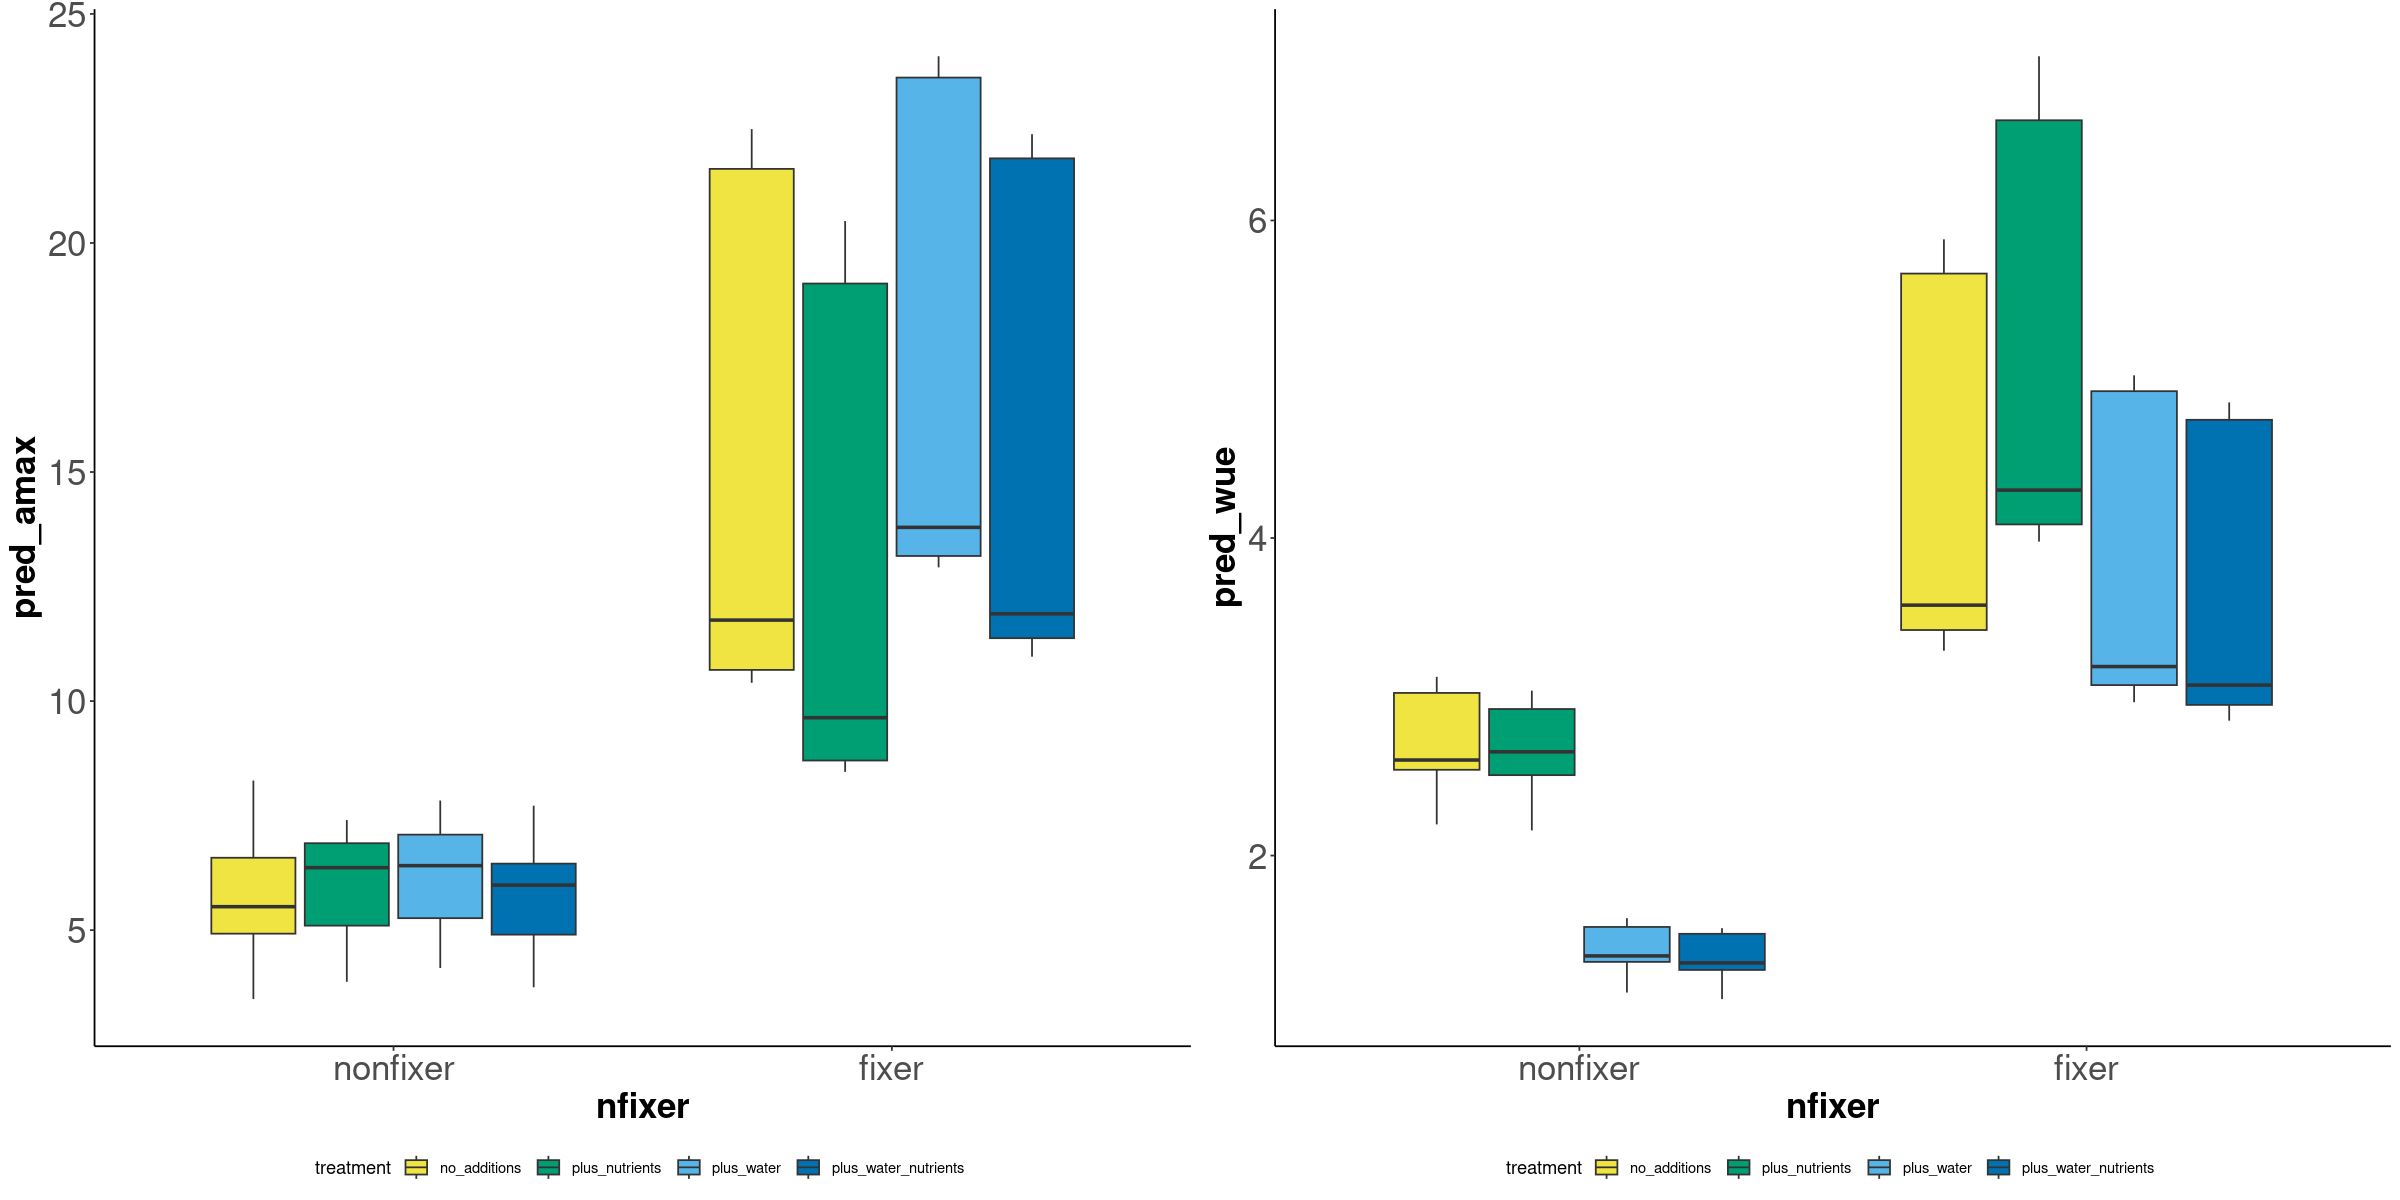

In [137]:
vars_q2_interaction %>%
      # Gererate plots
      pmap( ~ boxplot_plot_pmap(data = data_pred_traits,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3))) %>%
      cowplot::plot_grid(plotlist = ., ncol = 2)


In [138]:
vars_q2_treatment <-

  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_traits, where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_traits, treatment) %>%  names,
    group_var = dplyr::select(data_pred_traits, treatment) %>%  names) %>%

    filter(V1 %in% c('pred_gs', 'pred_n_area'))

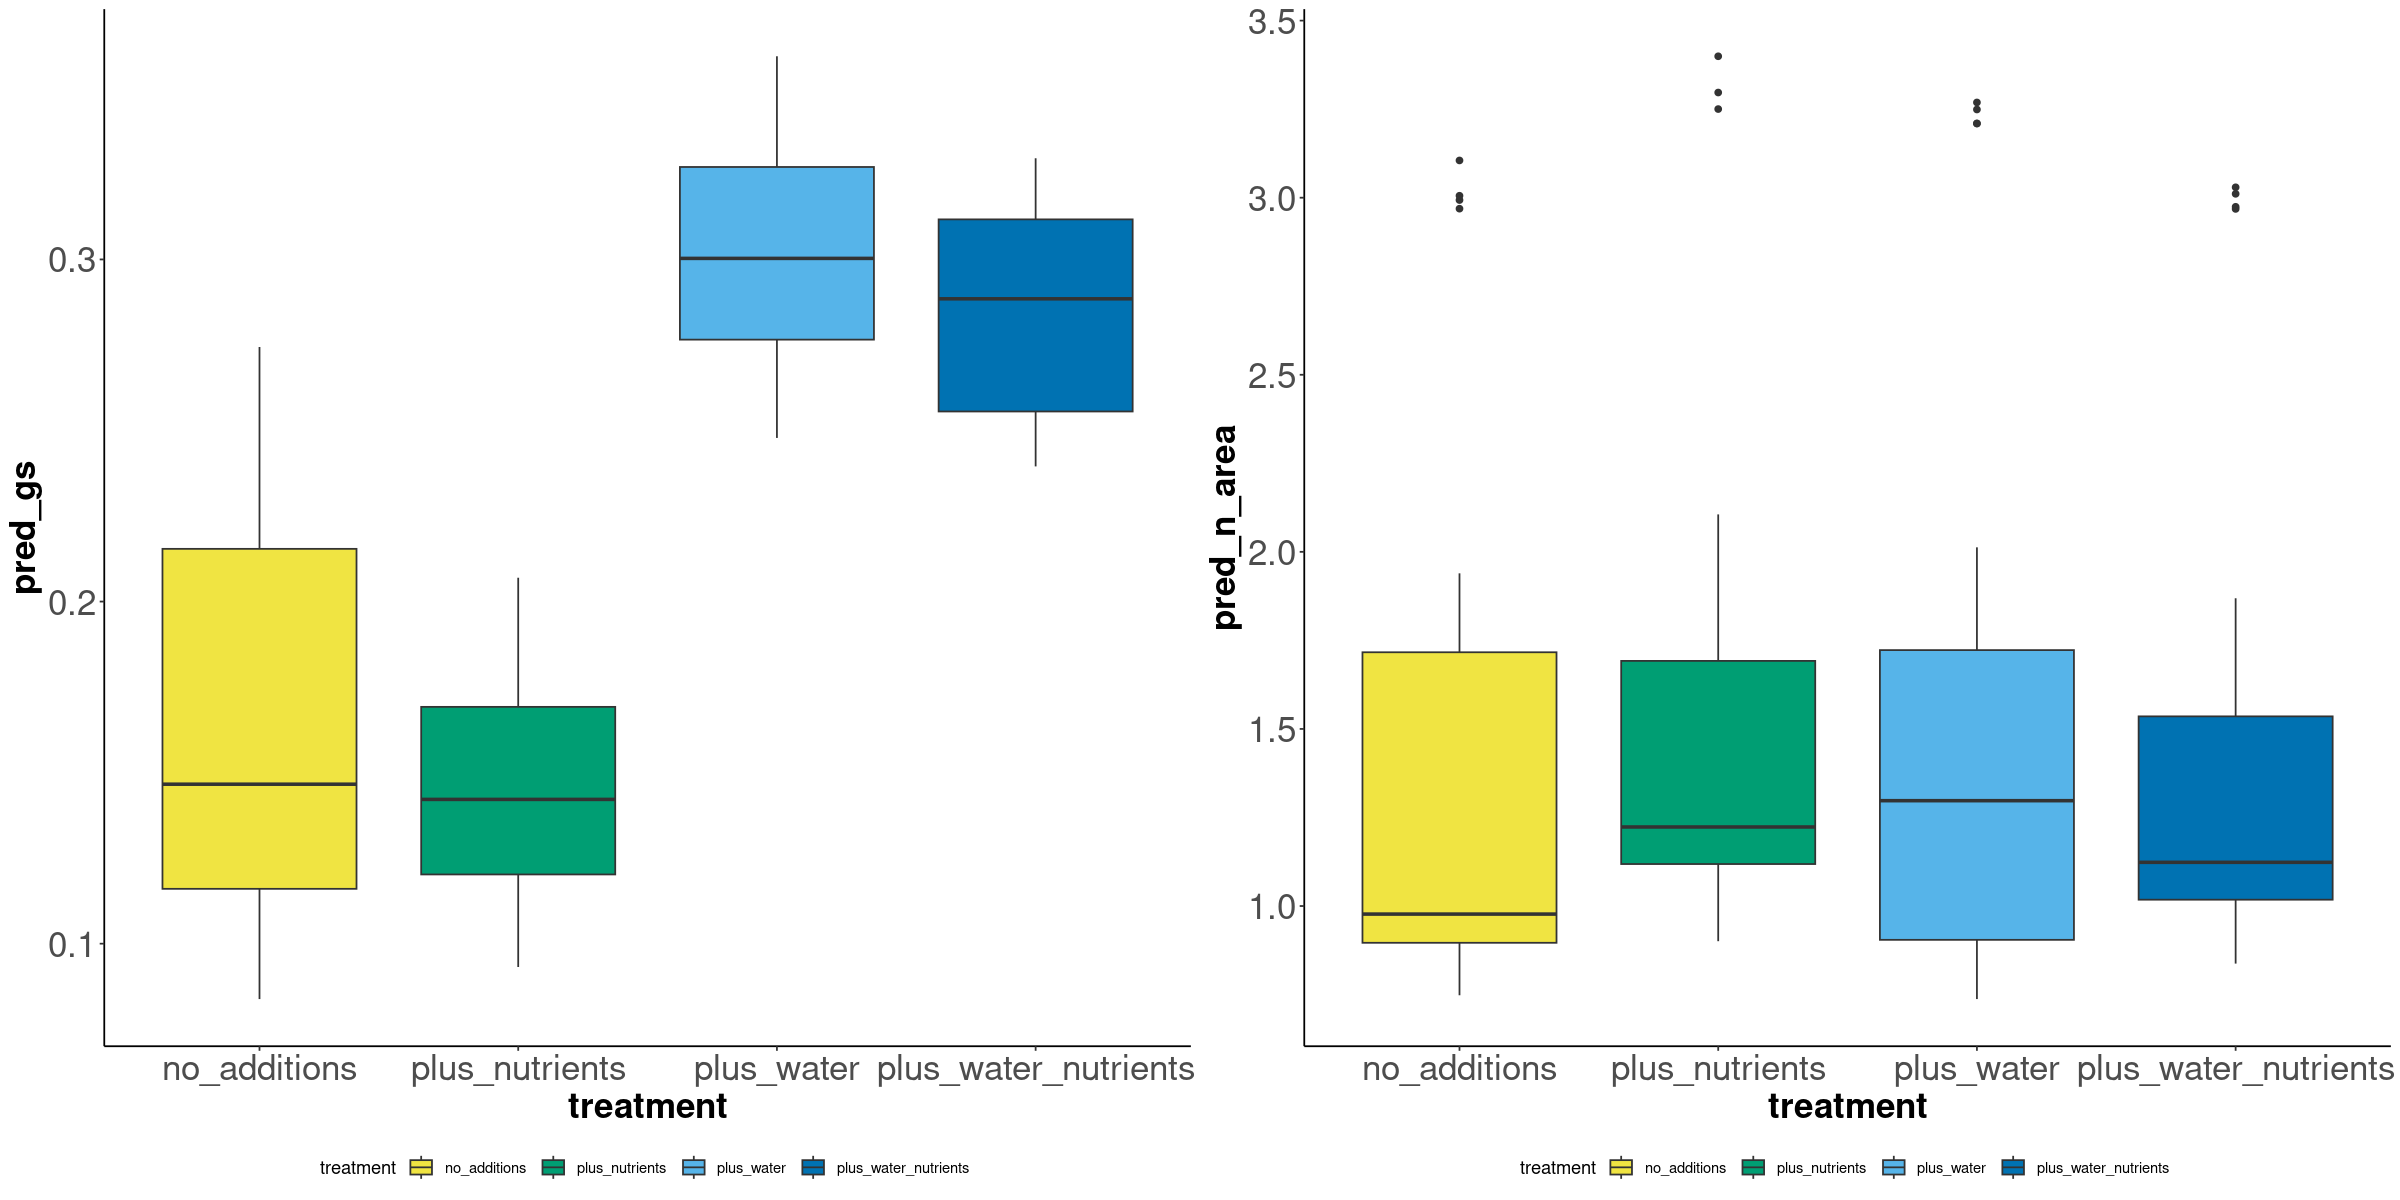

In [139]:
vars_q2_treatment %>%
      # Gererate plots
      pmap( ~ boxplot_plot_pmap(data = data_pred_traits,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3))) %>%
      cowplot::plot_grid(plotlist = ., ncol = 2)